In [2]:
import pandas as pd

# Leer los archivos .tsv
train_df = pd.read_csv('/home/benjamin/Documentos/IronHack/FinalProject/SemanticSense/task2-train-dev/train.tsv', sep='\t')
dev_df = pd.read_csv('/home/benjamin/Documentos/IronHack/FinalProject/SemanticSense/task2-train-dev/dev.tsv', sep='\t')

# Unir los dataframes
combined_df = pd.concat([train_df, dev_df], ignore_index=True)

# Guardar el dataframe combinado en un nuevo archivo (opcional)
combined_df.to_csv('/home/benjamin/Documentos/IronHack/FinalProject/SemanticSense/task2-train-dev/combined.tsv', sep='\t', index=False)

# Ahora puedes trabajar con combined_df
print(combined_df.head())

   id                                              tweet    label 
0   1  El Atlético resignado a perder HASHTAG 😔  http...  sadness 
1   2  Leer proporciona una mejor visión del mundo 🤓 ...      joy 
2   3  Amo a Arya Stark por encima de todas las cosas...      joy 
3   4  Gracias HASHTAG es increíble que una niña logr...   others 
4   5  Solo siento que hayamos perdido 24 escaños de ...  sadness 


In [3]:
# Verificar los nombres de las columnas en el dataframe combinado
print("Columnas en combined_df:", combined_df.columns)

Columnas en combined_df: Index(['id', 'tweet', 'label '], dtype='object')


In [4]:
# Renombrar la columna 'label ' a 'label' en combined_df
combined_df.rename(columns={'label ': 'label'}, inplace=True)

# Verificar los nombres de las columnas en el dataframe combinado
print("Columnas en combined_df:", combined_df.columns)

Columnas en combined_df: Index(['id', 'tweet', 'label'], dtype='object')


In [5]:
# Ver las opciones en la columna 'label'
unique_labels = combined_df['label'].unique()
print(unique_labels)

['sadness ' 'joy ' 'others ' 'surprise ' 'disgust ' 'anger ' 'fear ']


In [6]:
# Quitar los espacios en blanco al principio y al final de las etiquetas de la columna 'label'

combined_df['label'] = combined_df['label'].str.strip()

# Verificar los cambios en las etiquetas de la columna 'label'
unique_labels = combined_df['label'].unique()
print(unique_labels)


['sadness' 'joy' 'others' 'surprise' 'disgust' 'anger' 'fear']


Cambio las etiquetas de las emociones para que coincidad con las del dataset de los audios, * Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Los cambios son los siguientes:
- sadness -> sad
- joy -> happy
- anger -> angry
- fear -> fearful
- surprise -> surprised

Igual que en el dataset de los audios, solo analizaremos 'sad', 'happy', 'angry', 'fearful', 'surprised'

In [7]:
# Cambiar las etiquetas de las emociones
combined_df['label'] = combined_df['label'].replace({
    'sadness': 'sad',
    'joy': 'happy',
    'anger': 'angry',
    'fear': 'fearful',
    'surprise': 'surprised'
})

In [8]:
# Verificar los cambios en las etiquetas de la columna 'label'
unique_labels = combined_df['label'].unique()
print(unique_labels)

['sad' 'happy' 'others' 'surprised' 'disgust' 'angry' 'fearful']


In [9]:

# Guardar el dataframe combinado con los cambios.
combined_df.to_csv('/home/benjamin/Documentos/IronHack/FinalProject/SemanticSense/task2-train-dev/combined.tsv', sep='\t', index=False)

In [10]:
# Filtrar solo las etiquetas relevantes
relevant_labels = ['sad', 'happy', 'angry', 'fearful', 'surprised']
filtered_df = combined_df[combined_df['label'].isin(relevant_labels)]

# Ver las opciones en la columna 'label'
unique_labels = filtered_df['label'].unique()
print(unique_labels)

['sad' 'happy' 'surprised' 'angry' 'fearful']


In [11]:
# Guardar el dataframe filtrado en un .tsv
filtered_df.to_csv('/home/benjamin/Documentos/IronHack/FinalProject/SemanticSense/task2-train-dev/filtered.tsv', sep='\t', index=False)

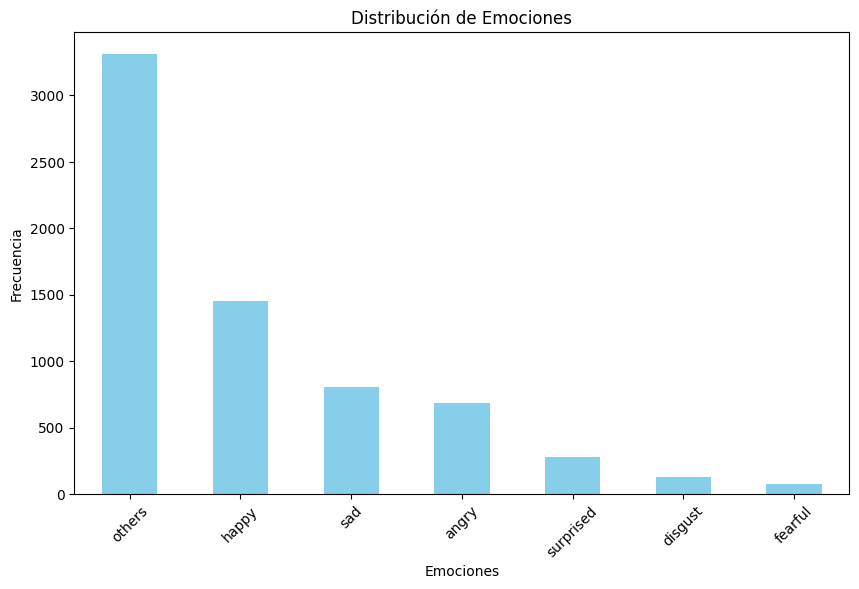

In [12]:
# Contar las emociones
emotion_counts = combined_df['label'].value_counts()

# Crear el diagrama de barras
import matplotlib.pyplot as plt

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Emociones')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

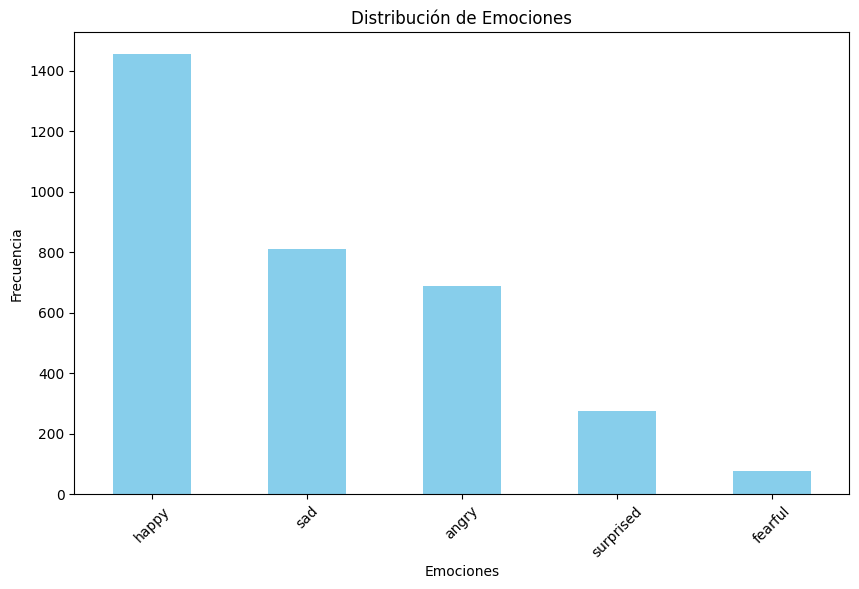

In [13]:
# Contar las emociones
emotion_counts = filtered_df['label'].value_counts()

# Crear el diagrama de barras
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Emociones')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Recuento de label filtrado
emotion_counts = filtered_df['label'].value_counts()
print(emotion_counts)

# Total de datos filtrados
total_filtered = filtered_df.shape[0]
print("Total de datos filtrados:", total_filtered)


label
happy        1455
sad           809
angry         687
surprised     276
fearful        77
Name: count, dtype: int64
Total de datos filtrados: 3304


/tmp/ipykernel_9153/91710480.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['label'] = filtered_df['label'].str.strip().str.lower()


Distribución de clases antes de SMOTE: Counter({'happy': 1455, 'sad': 809, 'angry': 687, 'surprised': 276, 'fearful': 77})
Distribución de clases después de SMOTE: Counter({'sad': 1455, 'happy': 1455, 'surprised': 1455, 'angry': 1455, 'fearful': 1455})


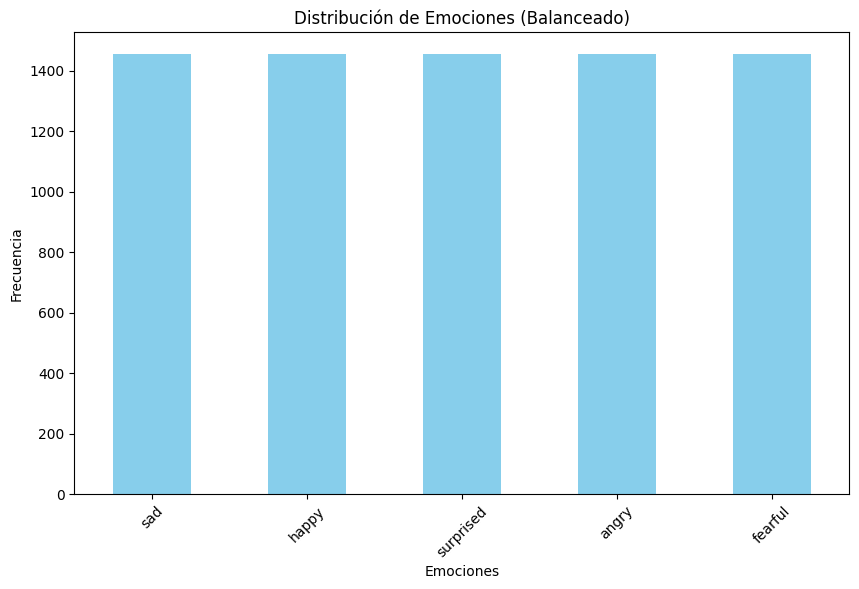

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar solo las etiquetas relevantes
relevant_labels = ['sad', 'happy', 'angry', 'fearful', 'surprised']
filtered_df = combined_df[combined_df['label'].isin(relevant_labels)]

# Limpiar las etiquetas en la columna 'label'
filtered_df['label'] = filtered_df['label'].str.strip().str.lower()

# Separar las características y las etiquetas
X = filtered_df['tweet']
y = filtered_df['label']

# Convertir el texto a características numéricas usando TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Verificar la distribución de las clases después de aplicar SMote
print("Distribución de clases antes de SMOTE:", Counter(y))
print("Distribución de clases después de SMOTE:", Counter(y_resampled))

# Crear un nuevo dataframe con los datos balanceados
balanced_df = pd.DataFrame(X_resampled.toarray(), columns=vectorizer.get_feature_names_out())
balanced_df['label'] = y_resampled

# Contar las emociones en el dataframe balanceado
emotion_counts_balanced = balanced_df['label'].value_counts()

# Crear el diagrama de barras para el dataframe balanceado
plt.figure(figsize=(10, 6))
emotion_counts_balanced.plot(kind='bar', color='skyblue')
plt.title('Distribución de Emociones (Balanceado)')
plt.xlabel('Emociones')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

Reporte de clasificación:
              precision    recall  f1-score   support

       angry       0.80      0.88      0.84       295
     fearful       0.97      1.00      0.99       280
       happy       0.85      0.78      0.81       298
         sad       0.92      0.86      0.88       304
   surprised       0.90      0.93      0.91       278

    accuracy                           0.89      1455
   macro avg       0.89      0.89      0.89      1455
weighted avg       0.89      0.89      0.89      1455

Matriz de confusión:
[[260   1  15  14   5]
 [  0 280   0   0   0]
 [ 36   3 231  10  18]
 [ 24   1  13 260   6]
 [  5   3  12   0 258]]
Precisión: 0.8859106529209622


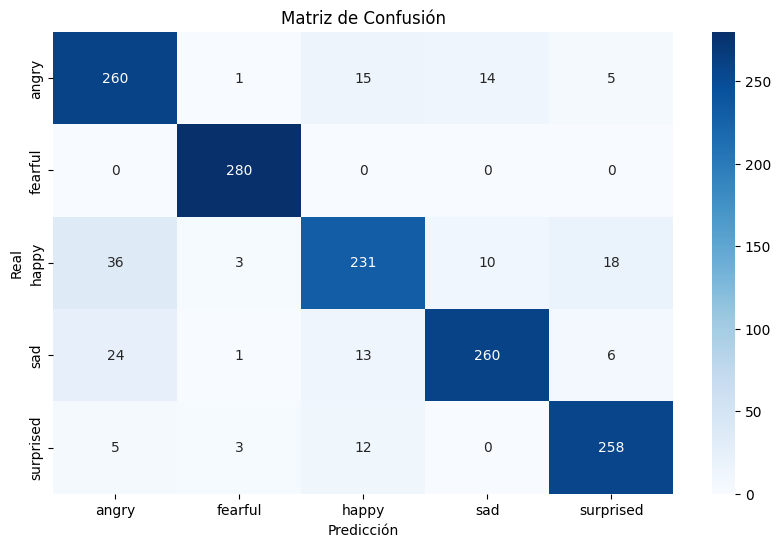

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir el dataset balanceado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión: {accuracy}")

# Visualizar la matriz de confusión
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

       angry       0.86      0.86      0.86       295
     fearful       1.00      1.00      1.00       280
       happy       0.74      0.87      0.80       298
         sad       0.95      0.82      0.88       304
   surprised       0.96      0.93      0.95       278

    accuracy                           0.89      1455
   macro avg       0.90      0.89      0.90      1455
weighted avg       0.90      0.89      0.89      1455

Precisión (Random Forest): 0.8914089347079038
Matriz de confusión (Random Forest):
[[253   0  36   5   1]
 [  0 279   1   0   0]
 [ 22   1 258   9   8]
 [ 16   0  39 248   1]
 [  2   0  17   0 259]]


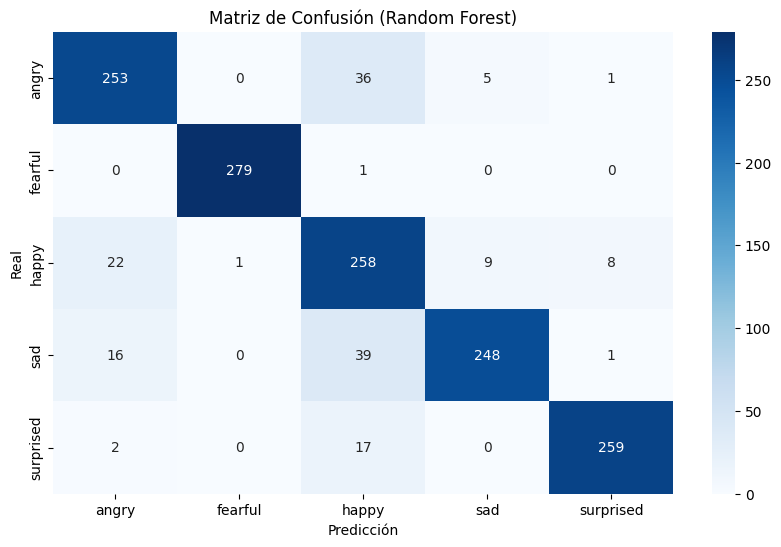

Reporte de clasificación (SVM):
              precision    recall  f1-score   support

       angry       0.91      0.86      0.89       295
     fearful       1.00      1.00      1.00       280
       happy       0.76      0.94      0.84       298
         sad       0.97      0.86      0.91       304
   surprised       1.00      0.93      0.96       278

    accuracy                           0.92      1455
   macro avg       0.93      0.92      0.92      1455
weighted avg       0.93      0.92      0.92      1455

Precisión (SVM): 0.9168384879725086
Matriz de confusión (SVM):
[[255   0  35   5   0]
 [  0 280   0   0   0]
 [ 15   0 279   4   0]
 [  6   0  36 262   0]
 [  3   0  17   0 258]]


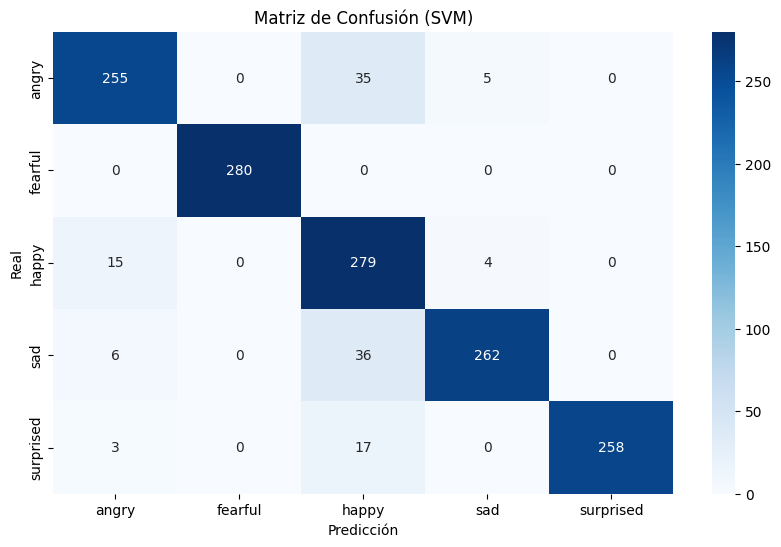

Reporte de clasificación (Gradient Boosting):
              precision    recall  f1-score   support

       angry       0.77      0.78      0.77       295
     fearful       0.97      0.97      0.97       280
       happy       0.69      0.82      0.75       298
         sad       0.91      0.77      0.83       304
   surprised       0.87      0.84      0.86       278

    accuracy                           0.83      1455
   macro avg       0.84      0.83      0.84      1455
weighted avg       0.84      0.83      0.83      1455

Precisión (Gradient Boosting): 0.8329896907216495
Matriz de confusión (Gradient Boosting):
[[229   0  40  18   8]
 [  3 272   3   0   2]
 [ 26   5 243   4  20]
 [ 25   1  39 234   5]
 [ 14   2  27   1 234]]


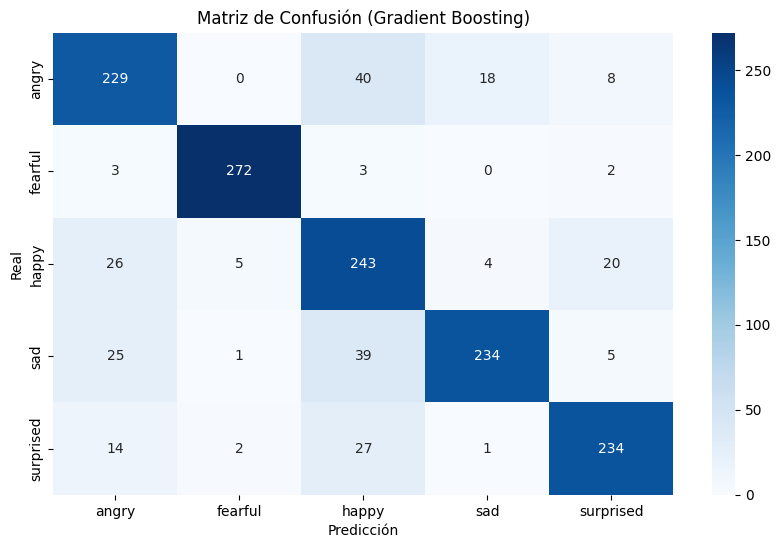

Reporte de clasificación (XGBoost):
              precision    recall  f1-score   support

       angry       0.83      0.82      0.83       295
     fearful       0.99      0.99      0.99       280
       happy       0.72      0.85      0.78       298
         sad       0.90      0.81      0.85       304
   surprised       0.93      0.89      0.91       278

    accuracy                           0.87      1455
   macro avg       0.88      0.87      0.87      1455
weighted avg       0.87      0.87      0.87      1455

Precisión (XGBoost): 0.8673539518900344
Matriz de confusión (XGBoost):
[[241   0  36  14   4]
 [  0 276   4   0   0]
 [ 19   2 253  12  12]
 [ 22   1  34 245   2]
 [  7   1  23   0 247]]


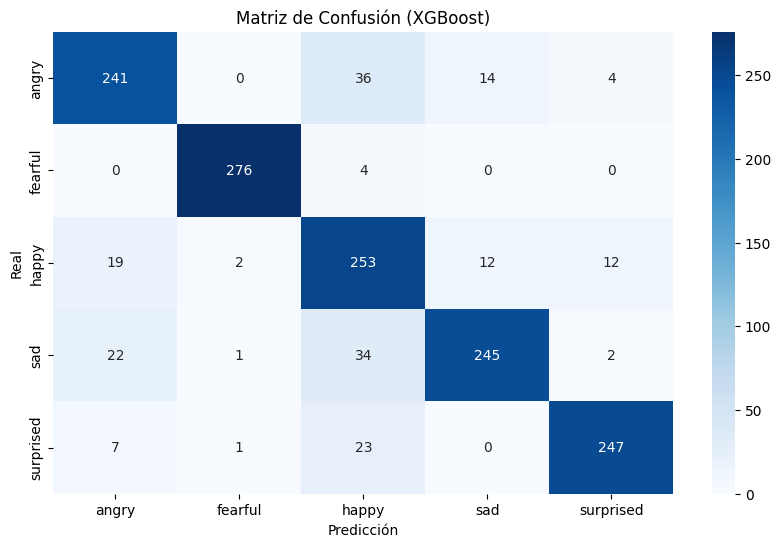

In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Dividir el dataset balanceado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Función para entrenar y evaluar un modelo
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    y_test_decoded = label_encoder.inverse_transform(y_test)
    print(f"Reporte de clasificación ({model_name}):")
    print(classification_report(y_test_decoded, y_pred_decoded))
    print(f"Precisión ({model_name}): {accuracy_score(y_test_decoded, y_pred_decoded)}")
    print(f"Matriz de confusión ({model_name}):")
    print(confusion_matrix(y_test_decoded, y_pred_decoded))
    plt.figure(figsize=(10, 6))
    sns.heatmap(confusion_matrix(y_test_decoded, y_pred_decoded), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Matriz de Confusión ({model_name})')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

# Modelos a evaluar
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (SVC(random_state=42), "SVM"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (XGBClassifier(random_state=42), "XGBoost")
]

# Entrenar y evaluar cada modelo
for model, model_name in models:
    train_and_evaluate(model, model_name)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  11.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  11.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  11.5s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  11.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=  12.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  13.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  14.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  15.0s
[CV] END ...................

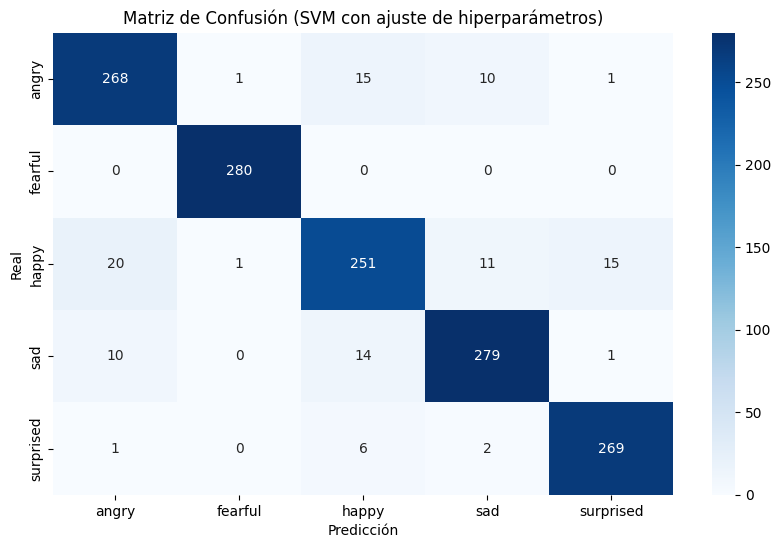

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)

# Dividir el dataset balanceado en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_encoded, test_size=0.2, random_state=42)

# Definir el modelo SVM
svm_model = SVC(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores hiperparámetros
best_svm_model = grid_search.best_estimator_
y_pred = best_svm_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

print("Reporte de clasificación (SVM con ajuste de hiperparámetros):")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Matriz de confusión (SVM con ajuste de hiperparámetros):")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_decoded, y_pred_decoded), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (SVM con ajuste de hiperparámetros)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [19]:
# Calcular la precisión
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Precisión del modelo SVM con ajuste de hiperparámetros: {accuracy}")


Precisión del modelo SVM con ajuste de hiperparámetros: 0.9257731958762887


In [20]:
# Guardar el modelo entrenado

import joblib

joblib.dump(best_svm_model, 'svm_model.pkl')
print("Modelo guardado como svm_model.pkl")

Modelo guardado como svm_model.pkl


Modelo cargado desde svm_model.pkl
Reporte de clasificación (Modelo cargado):
              precision    recall  f1-score   support

       angry       0.90      0.91      0.90       295
     fearful       0.99      1.00      1.00       280
       happy       0.88      0.84      0.86       298
         sad       0.92      0.92      0.92       304
   surprised       0.94      0.97      0.95       278

    accuracy                           0.93      1455
   macro avg       0.93      0.93      0.93      1455
weighted avg       0.93      0.93      0.93      1455

Matriz de confusión (Modelo cargado):
[[268   1  15  10   1]
 [  0 280   0   0   0]
 [ 20   1 251  11  15]
 [ 10   0  14 279   1]
 [  1   0   6   2 269]]
Precisión del modelo cargado: 0.9257731958762887


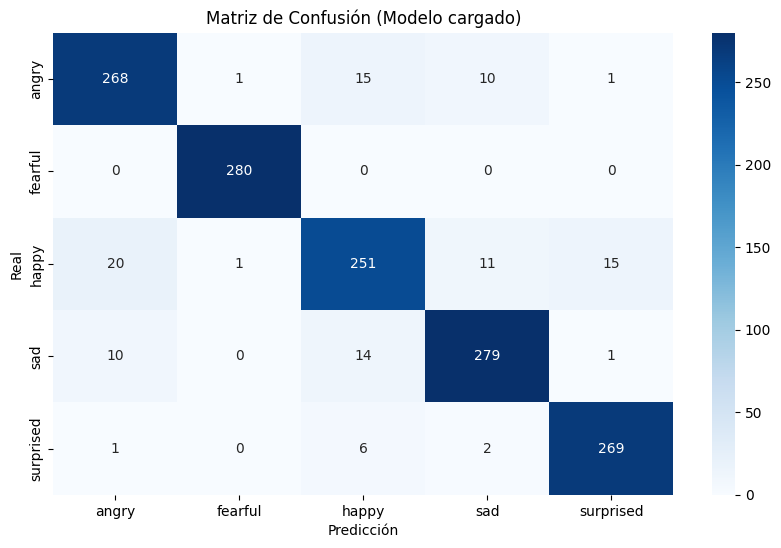

In [21]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el modelo guardado
loaded_model = joblib.load('svm_model.pkl')
print("Modelo cargado desde svm_model.pkl")

# Hacer predicciones en el conjunto de prueba
y_pred = loaded_model.predict(X_test)
y_pred_decoded = label_encoder.inverse_transform(y_pred)
y_test_decoded = label_encoder.inverse_transform(y_test)

# Evaluar el modelo
print("Reporte de clasificación (Modelo cargado):")
print(classification_report(y_test_decoded, y_pred_decoded))

print("Matriz de confusión (Modelo cargado):")
print(confusion_matrix(y_test_decoded, y_pred_decoded))

# Calcular la precisión
accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"Precisión del modelo cargado: {accuracy}")

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_decoded, y_pred_decoded), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Matriz de Confusión (Modelo cargado)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [22]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar el modelo guardado
loaded_model = joblib.load('svm_model.pkl')
print("Modelo cargado desde svm_model.pkl")

# Cargar el vectorizador guardado
vectorizer = joblib.load('tfidf_vectorizer.pkl')
print("Vectorizador cargado desde tfidf_vectorizer.pkl")

# Cargar el codificador de etiquetas guardado
label_encoder = joblib.load('label_encoder.pkl')
print("Codificador de etiquetas cargado desde label_encoder.pkl")

# Función para predecir la emoción de una frase
def predecir_emocion(frase):
    # Preprocesar la frase
    frase_vectorizada = vectorizer.transform([frase])
    
    # Hacer la predicción
    prediccion = loaded_model.predict(frase_vectorizada)
    
    # Decodificar la predicción
    emocion = label_encoder.inverse_transform(prediccion)
    
    return emocion[0]

# Ejemplo de uso
frase = "Estoy muy feliz con los resultados"
emocion_predicha = predecir_emocion(frase)
print(f"La emoción predicha para la frase '{frase}' es: {emocion_predicha}")

Modelo cargado desde svm_model.pkl


FileNotFoundError: [Errno 2] No such file or directory: 'tfidf_vectorizer.pkl'